# Análise dos Atributos e Seleção dos Melhores para a Classificação
Essa etapa consiste em analisar o dataset que foi construído a partir da união dos outros e aplicar técnicas de seleção de atributos, a fim de garantir um bom desempenho dos modelos. Primeiramente, foi realizada uma análise exploratória do PLD, seguida de uma primeira filtragem de atributos via matriz de correlação. Em seguida, foram criadas colunas deslocadas de cada atributo (1 a 52 semanas), que foram submetidas a um teste ANOVA para a seleção dos melhores atributos para a predição. Enfim, foram criadas as classes para o dataset e o dataframe resultante foi exportado

### Importando biblioteca e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
df = pd.read_csv("dataset_final.csv", index_col=0)
df

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,NORDESTE
0,2001_26,49967.000000,86275.000000,24.665715,15748.000000,50.405714,15748.000000,50.405714,30626.829167,0.000,0.000,516832.400,4365.200,684.00
1,2001_27,49967.000000,83856.000000,23.975714,14743.000000,55.701429,14743.000000,55.701429,30884.287500,0.000,0.000,518354.200,4925.300,684.00
2,2001_28,49967.000000,80822.000000,23.107143,13516.000000,51.065715,13516.000000,51.065715,31565.279167,0.000,0.000,530866.900,9295.000,684.00
3,2001_29,49967.000000,78341.000000,22.397143,14336.000000,54.162857,14336.000000,54.162857,31601.104167,0.000,0.000,530718.000,11633.200,684.00
4,2001_30,49967.000000,75390.000000,21.555714,13225.000000,49.965714,13225.000000,49.965714,31512.925000,0.000,0.000,524841.700,11341.700,684.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,69394.940430,71.678028,67518.065918,69.732571,92248.962667,1837907.081,458661.260,562254.888,78500.240,61.07
1199,2024_6,51691.226562,208488.951172,57.619328,55566.128906,55.751185,55565.414062,55.750471,94768.395542,1863578.510,428128.978,528567.834,73544.726,61.07
1200,2024_7,51691.226562,216617.564453,59.865815,66338.486328,66.559414,66164.742188,66.385099,90516.597125,1210779.483,450069.236,584409.522,71620.925,61.07
1201,2024_8,51691.226562,226541.818359,62.608529,78362.863281,78.623812,76254.765625,76.508686,91586.811458,884045.960,387587.176,701025.589,70255.280,61.60


In [3]:
df = df.rename(columns={'NORDESTE': 'PLD'})
df

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,PLD
0,2001_26,49967.000000,86275.000000,24.665715,15748.000000,50.405714,15748.000000,50.405714,30626.829167,0.000,0.000,516832.400,4365.200,684.00
1,2001_27,49967.000000,83856.000000,23.975714,14743.000000,55.701429,14743.000000,55.701429,30884.287500,0.000,0.000,518354.200,4925.300,684.00
2,2001_28,49967.000000,80822.000000,23.107143,13516.000000,51.065715,13516.000000,51.065715,31565.279167,0.000,0.000,530866.900,9295.000,684.00
3,2001_29,49967.000000,78341.000000,22.397143,14336.000000,54.162857,14336.000000,54.162857,31601.104167,0.000,0.000,530718.000,11633.200,684.00
4,2001_30,49967.000000,75390.000000,21.555714,13225.000000,49.965714,13225.000000,49.965714,31512.925000,0.000,0.000,524841.700,11341.700,684.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,69394.940430,71.678028,67518.065918,69.732571,92248.962667,1837907.081,458661.260,562254.888,78500.240,61.07
1199,2024_6,51691.226562,208488.951172,57.619328,55566.128906,55.751185,55565.414062,55.750471,94768.395542,1863578.510,428128.978,528567.834,73544.726,61.07
1200,2024_7,51691.226562,216617.564453,59.865815,66338.486328,66.559414,66164.742188,66.385099,90516.597125,1210779.483,450069.236,584409.522,71620.925,61.07
1201,2024_8,51691.226562,226541.818359,62.608529,78362.863281,78.623812,76254.765625,76.508686,91586.811458,884045.960,387587.176,701025.589,70255.280,61.60


### Análise Exploratória

Verificando nulos e NaN

In [4]:
df.isnull().sum()

Ano_sem                                 0
ear_max_subsistema                      0
ear_verif_subsistema_mwmes              0
ear_verif_subsistema_percentual         0
ena_bruta_regiao_mwmed                  0
ena_bruta_regiao_percentualmlt          0
ena_armazenavel_regiao_mwmed            0
ena_armazenavel_regiao_percentualmlt    0
val_cargaenergiamwmed                   0
EOLIELÉTRICA                            0
FOTOVOLTAICA                            0
HIDROELÉTRICA                           0
TÉRMICA                                 0
PLD                                     0
dtype: int64

In [5]:
df.isna().sum()

Ano_sem                                 0
ear_max_subsistema                      0
ear_verif_subsistema_mwmes              0
ear_verif_subsistema_percentual         0
ena_bruta_regiao_mwmed                  0
ena_bruta_regiao_percentualmlt          0
ena_armazenavel_regiao_mwmed            0
ena_armazenavel_regiao_percentualmlt    0
val_cargaenergiamwmed                   0
EOLIELÉTRICA                            0
FOTOVOLTAICA                            0
HIDROELÉTRICA                           0
TÉRMICA                                 0
PLD                                     0
dtype: int64

Resumo dos dados numéricos

In [6]:
df.describe()

,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,PLD
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1.203000e+03,1203.000000,1.203000e+03,1203.000000,1203.000000
mean,51444.418693,190676.078537,53.012662,38252.815035,67.448731,36920.955702,65.732922,61530.674737,4.128927e+05,42580.236391,7.292357e+05,217068.223733,164.513608
std,680.958166,91668.080469,25.406819,33080.990802,30.858333,30388.195888,28.778372,14655.839628,5.849876e+05,96601.342533,2.644178e+05,222851.067487,189.783171
min,49967.000000,7524.000000,4.401429,4828.000000,12.817143,4492.000000,12.302857,11527.511250,0.000000e+00,0.000000,1.917363e+05,236.570000,4.000000
25%,51602.070312,117673.924805,32.757143,14961.959473,44.823572,14877.771851,44.235714,49506.479583,1.400010e+03,0.000000,5.378757e+05,35411.545000,23.555000
50%,51766.000000,191875.765625,53.200000,24849.904053,62.815715,24640.000000,62.585716,62655.500625,5.153756e+04,0.000000,7.078629e+05,106883.260000,80.480000
75%,51809.000000,266471.585938,73.788478,50337.918701,84.701428,49648.403809,83.440000,72547.758021,7.298077e+05,38758.652500,9.547110e+05,394779.559500,222.700000
max,52624.082031,359797.000000,99.292856,200270.000000,207.692856,159297.000000,206.412857,100176.802917,2.569393e+06,478350.759000,1.321419e+06,846327.313000,822.830000


Através do boxplot abaixo, nota-se que o PLD possui muitos outliers. Isso põe em dúvida qual valor de limite utilizar para separar as classes

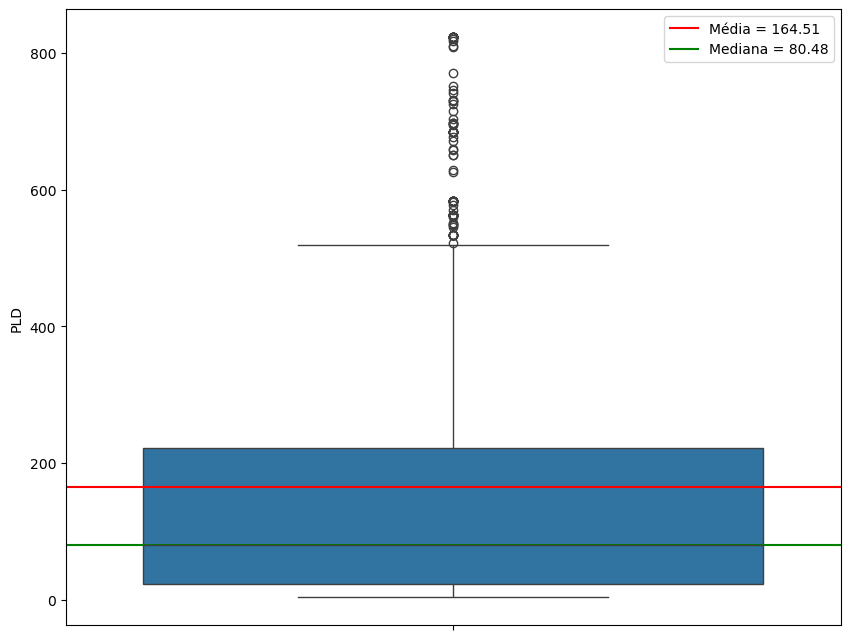

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.PLD)
plt.axhline(y=df.PLD.mean(), color='red', label=f"Média = {df.PLD.mean():.2f}")
plt.axhline(y=df.PLD.median(), color='green', label=f"Mediana = {df.PLD.median():.2f}")
plt.legend()

Pelo histograma do PLD, é perceptível uma grande concentração de valores mais baixos. Sendo assim, as classes provavelmente serão bastante desbalanceadas

<Axes: title={'center': 'Histograma do PLD'}, xlabel='PLD', ylabel='Count'>

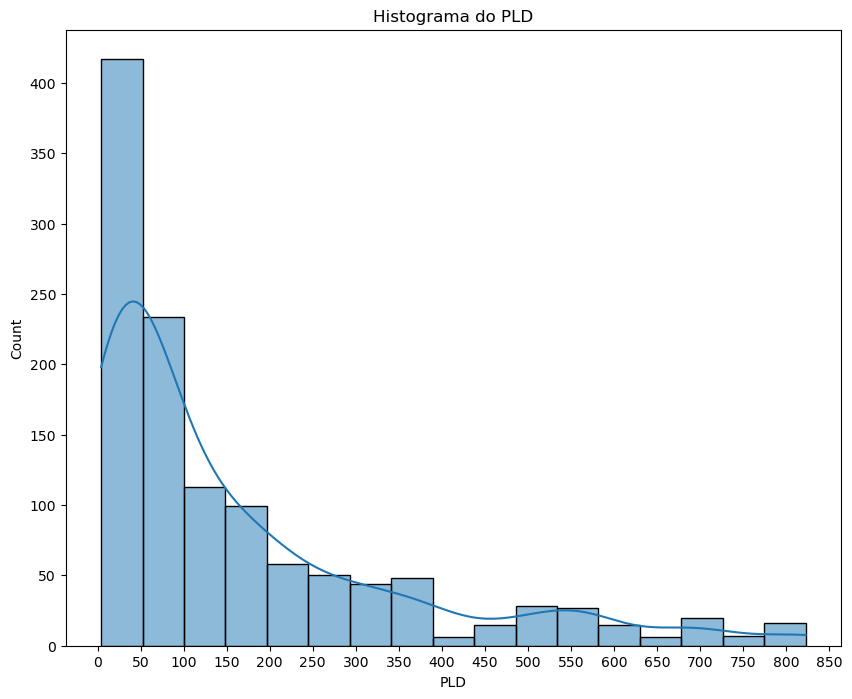

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Histograma do PLD")
plt.xticks(range(0, 900, 50))
sns.histplot(df.PLD, kde=True, bins=17)

### Seleção de Atributos: Matriz de correlação

Foi gerada uma matriz de correlação dos atributos. Atributos com correlaçao muito próxima de 1 podem ser redundantes para os algoritmos. Além disso, é possível identificar variáveis que não interferem muito no pld, como a geraçao eólica

<Axes: title={'center': 'Matriz de Correlação dos Atributos'}>

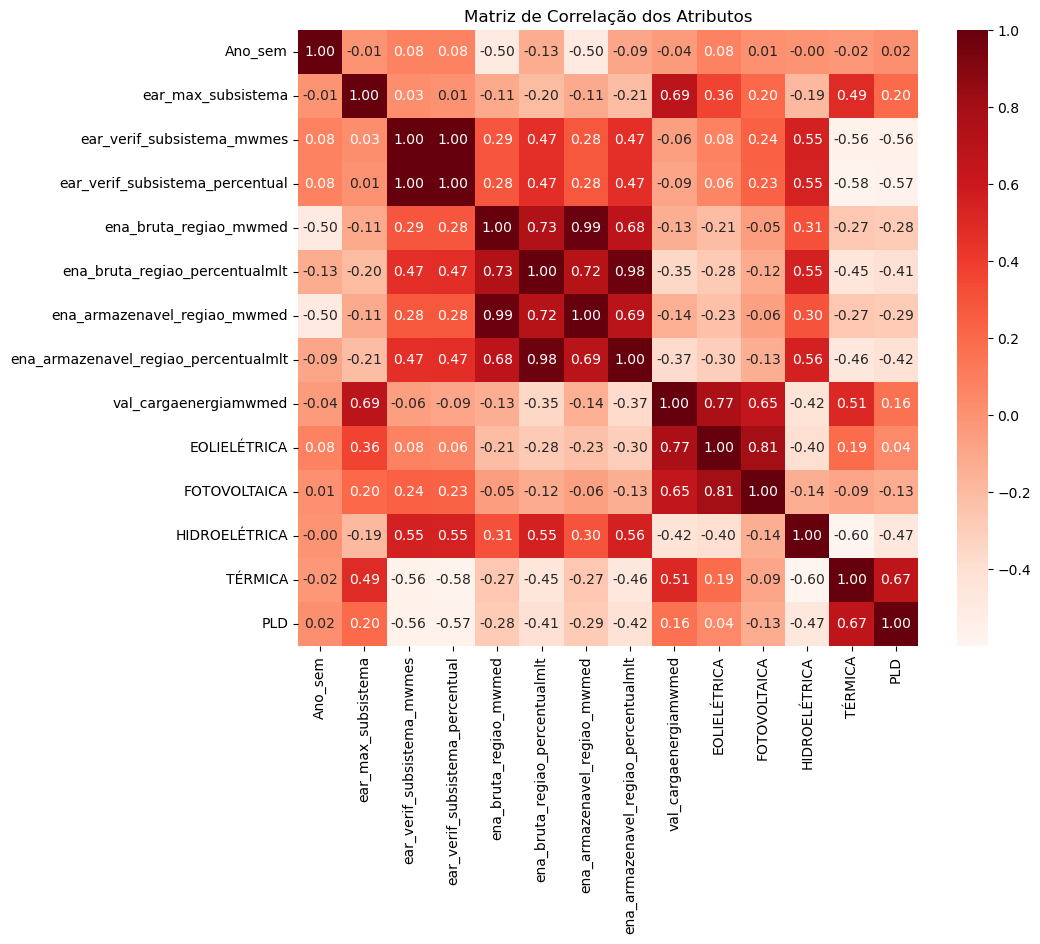

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Matriz de Correlação dos Atributos")
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds')

In [10]:
# Removendo atributos redundantes ou que nao contribuem para a classificação
#df.drop(["Ano_sem", "ear_max_subsistema", "ear_verif_subsistema_percentual", "ena_armazenavel_regiao_mwmed", "EOLIELÉTRICA", "FOTOVOLTAICA"], axis=1, inplace=True)

## Seleção de Atributos: Colunas atrasadas no tempo

In [11]:
df_x = df.drop(["PLD"],axis=1)

Utiliza a função shift para deslocar os atributos. Além disso, foi realizado um tratamento para renomear as novas colunas. o sufixo após o '_' refere-se a quantas semanas atrasadas a coluna está

In [12]:
cont = np.arange(start=1, stop=53, step=1)
columns = df_x.columns
df_shifted = df_x.copy()
for i in cont:
    shift = df_x.shift(i) # faz o deslocamento das variaveis
    shift.columns = columns + "_" + str(i)  # cria o nome para as colunas novas
    df_shifted = df_shifted.merge(shift, how='left', left_index=True, right_index=True) # une o dataset com cada um de seus lags
df_shifted

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,...,ear_verif_subsistema_percentual_52,ena_bruta_regiao_mwmed_52,ena_bruta_regiao_percentualmlt_52,ena_armazenavel_regiao_mwmed_52,ena_armazenavel_regiao_percentualmlt_52,val_cargaenergiamwmed_52,EOLIELÉTRICA_52,FOTOVOLTAICA_52,HIDROELÉTRICA_52,TÉRMICA_52
0,2001_26,49967.000000,86275.000000,24.665715,15748.000000,50.405714,15748.000000,50.405714,30626.829167,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001_27,49967.000000,83856.000000,23.975714,14743.000000,55.701429,14743.000000,55.701429,30884.287500,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001_28,49967.000000,80822.000000,23.107143,13516.000000,51.065715,13516.000000,51.065715,31565.279167,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001_29,49967.000000,78341.000000,22.397143,14336.000000,54.162857,14336.000000,54.162857,31601.104167,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001_30,49967.000000,75390.000000,21.555714,13225.000000,49.965714,13225.000000,49.965714,31512.925000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,69394.940430,71.678028,67518.065918,69.732571,92248.962667,1837907.081,...,76.166726,15637.380127,67.847384,15603.774902,67.701584,80289.404375,1963342.809,315938.101,603827.790,64308.759
1199,2024_6,51691.226562,208488.951172,57.619328,55566.128906,55.751185,55565.414062,55.750471,94768.395542,1863578.510,...,74.999187,14433.069824,62.622143,14433.069824,62.622143,86115.436875,1572027.032,395078.243,643151.959,62151.306
1200,2024_7,51691.226562,216617.564453,59.865815,66338.486328,66.559414,66164.742188,66.385099,90516.597125,1210779.483,...,73.483685,14278.548828,65.113171,14244.228882,64.964271,86596.774417,1695740.475,367505.220,604337.435,64819.685
1201,2024_8,51691.226562,226541.818359,62.608529,78362.863281,78.623812,76254.765625,76.508686,91586.811458,884045.960,...,71.891372,14370.787109,69.820142,14337.896973,69.660342,81928.772292,2033495.610,313426.175,601013.439,60746.199


In [13]:
df_shifted.isna().sum() # Contabiliza a nova quantidade de nulos, ocasionada pelos lags

Ano_sem                             0
ear_max_subsistema                  0
ear_verif_subsistema_mwmes          0
ear_verif_subsistema_percentual     0
ena_bruta_regiao_mwmed              0
                                   ..
val_cargaenergiamwmed_52           52
EOLIELÉTRICA_52                    52
FOTOVOLTAICA_52                    52
HIDROELÉTRICA_52                   52
TÉRMICA_52                         52
Length: 689, dtype: int64

In [14]:
# Remove as primeiras colunas, por conta dos valores NaN
df_shifted = df_shifted.iloc[52:]
df_shifted

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,...,ear_verif_subsistema_percentual_52,ena_bruta_regiao_mwmed_52,ena_bruta_regiao_percentualmlt_52,ena_armazenavel_regiao_mwmed_52,ena_armazenavel_regiao_percentualmlt_52,val_cargaenergiamwmed_52,EOLIELÉTRICA_52,FOTOVOLTAICA_52,HIDROELÉTRICA_52,TÉRMICA_52
52,2002_32,49967.000000,165344.000000,47.272858,14458.000000,62.585716,14458.000000,62.585716,39540.125833,0.000,...,24.665715,15748.000000,50.405714,15748.000000,50.405714,30626.829167,0.000,0.000,516832.400,4365.200
53,2002_33,49967.000000,159801.000000,45.687144,13505.000000,58.460000,13505.000000,58.460000,39643.916250,0.000,...,23.975714,14743.000000,55.701429,14743.000000,55.701429,30884.287500,0.000,0.000,518354.200,4925.300
54,2002_34,49967.000000,153454.000000,43.874286,12516.000000,54.178571,12516.000000,54.178571,39591.752917,0.000,...,23.107143,13516.000000,51.065715,13516.000000,51.065715,31565.279167,0.000,0.000,530866.900,9295.000
55,2002_35,49967.000000,146962.000000,42.015714,11455.000000,50.418571,11455.000000,50.418571,39916.408333,0.000,...,22.397143,14336.000000,54.162857,14336.000000,54.162857,31601.104167,0.000,0.000,530718.000,11633.200
56,2002_36,49967.000000,139067.000000,39.758572,10203.000000,49.282857,10203.000000,49.282857,40654.814167,0.000,...,21.555714,13225.000000,49.965714,13225.000000,49.965714,31512.925000,0.000,0.000,524841.700,11341.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,69394.940430,71.678028,67518.065918,69.732571,92248.962667,1837907.081,...,76.166726,15637.380127,67.847384,15603.774902,67.701584,80289.404375,1963342.809,315938.101,603827.790,64308.759
1199,2024_6,51691.226562,208488.951172,57.619328,55566.128906,55.751185,55565.414062,55.750471,94768.395542,1863578.510,...,74.999187,14433.069824,62.622143,14433.069824,62.622143,86115.436875,1572027.032,395078.243,643151.959,62151.306
1200,2024_7,51691.226562,216617.564453,59.865815,66338.486328,66.559414,66164.742188,66.385099,90516.597125,1210779.483,...,73.483685,14278.548828,65.113171,14244.228882,64.964271,86596.774417,1695740.475,367505.220,604337.435,64819.685
1201,2024_8,51691.226562,226541.818359,62.608529,78362.863281,78.623812,76254.765625,76.508686,91586.811458,884045.960,...,71.891372,14370.787109,69.820142,14337.896973,69.660342,81928.772292,2033495.610,313426.175,601013.439,60746.199


### Teste ANOVA para seleção dos melhores atributos

In [23]:
# Testando o SelectKBest para selecionar as melhores variáveis
anova_selector = SelectKBest(score_func=f_classif, k=15)  # Seleciona os 15 melhores atributos
X_selected = anova_selector.fit_transform(df_shifted, df["PLD"].iloc[52:])

ind_melhores_atributos = anova_selector.get_support(indices=True)
print("Atributos selecionados:", ind_melhores_atributos)

Atributos selecionados: [  1  12  14 255 294 307 320 333 346 372 398 411 424 677 684]


In [24]:
#lista os atributos selecionados
for i in ind_melhores_atributos:
    print(df_shifted.columns[i])

ear_max_subsistema
TÉRMICA
ear_max_subsistema_1
val_cargaenergiamwmed_19
val_cargaenergiamwmed_22
val_cargaenergiamwmed_23
val_cargaenergiamwmed_24
val_cargaenergiamwmed_25
val_cargaenergiamwmed_26
val_cargaenergiamwmed_28
val_cargaenergiamwmed_30
val_cargaenergiamwmed_31
val_cargaenergiamwmed_32
ear_max_subsistema_52
val_cargaenergiamwmed_52


In [25]:
X_values = df_shifted.iloc[:, ind_melhores_atributos]
y_values = df["PLD"].iloc[52:]
X_values.reset_index(drop=True, inplace=True)
y_values.reset_index(drop=True, inplace=True) # reseta o index para evitar problemas

In [19]:
# Cria as classes de acordo com a faixa de preço. Os limiares estão presentes no vetor lim. os preços variam de muito baixo a muito alto
lim = [50, 90, 150, 450]
classes = df.PLD.apply(lambda x: 1 if x < lim[0] else
                       2 if x >= lim[0] and x < lim[1] else
                       3 if x >= lim[1] and x < lim[2] else
                       4 if x >= lim[2] and x < lim[3] else
                       5)

df_classes = df.drop(["PLD"], axis=1)
df_classes["Class"] = classes
df_classes

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,Class
0,2001_26,49967.000000,86275.000000,24.665715,15748.000000,50.405714,15748.000000,50.405714,30626.829167,0.000,0.000,516832.400,4365.200,5
1,2001_27,49967.000000,83856.000000,23.975714,14743.000000,55.701429,14743.000000,55.701429,30884.287500,0.000,0.000,518354.200,4925.300,5
2,2001_28,49967.000000,80822.000000,23.107143,13516.000000,51.065715,13516.000000,51.065715,31565.279167,0.000,0.000,530866.900,9295.000,5
3,2001_29,49967.000000,78341.000000,22.397143,14336.000000,54.162857,14336.000000,54.162857,31601.104167,0.000,0.000,530718.000,11633.200,5
4,2001_30,49967.000000,75390.000000,21.555714,13225.000000,49.965714,13225.000000,49.965714,31512.925000,0.000,0.000,524841.700,11341.700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,69394.940430,71.678028,67518.065918,69.732571,92248.962667,1837907.081,458661.260,562254.888,78500.240,2
1199,2024_6,51691.226562,208488.951172,57.619328,55566.128906,55.751185,55565.414062,55.750471,94768.395542,1863578.510,428128.978,528567.834,73544.726,2
1200,2024_7,51691.226562,216617.564453,59.865815,66338.486328,66.559414,66164.742188,66.385099,90516.597125,1210779.483,450069.236,584409.522,71620.925,2
1201,2024_8,51691.226562,226541.818359,62.608529,78362.863281,78.623812,76254.765625,76.508686,91586.811458,884045.960,387587.176,701025.589,70255.280,2


### Teste de Modelos

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [21]:
splits = TimeSeriesSplit(n_splits=5)
splits

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [22]:
for i, (train_index, test_index) in enumerate(splits.split(X_norm)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

NameError: name 'X_norm' is not defined

In [35]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_values)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_values, test_size=0.3, shuffle=False)

clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.34


In [83]:
clf = DecisionTreeClassifier()
tscv = TimeSeriesSplit(n_splits=10)

scores = cross_val_score(clf, X_norm, y_values, cv=tscv)
scores

array([0.50961538, 0.25961538, 0.49038462, 0.41346154, 0.14423077,
       0.51923077, 0.26923077, 0.28846154, 0.28846154, 0.49038462])

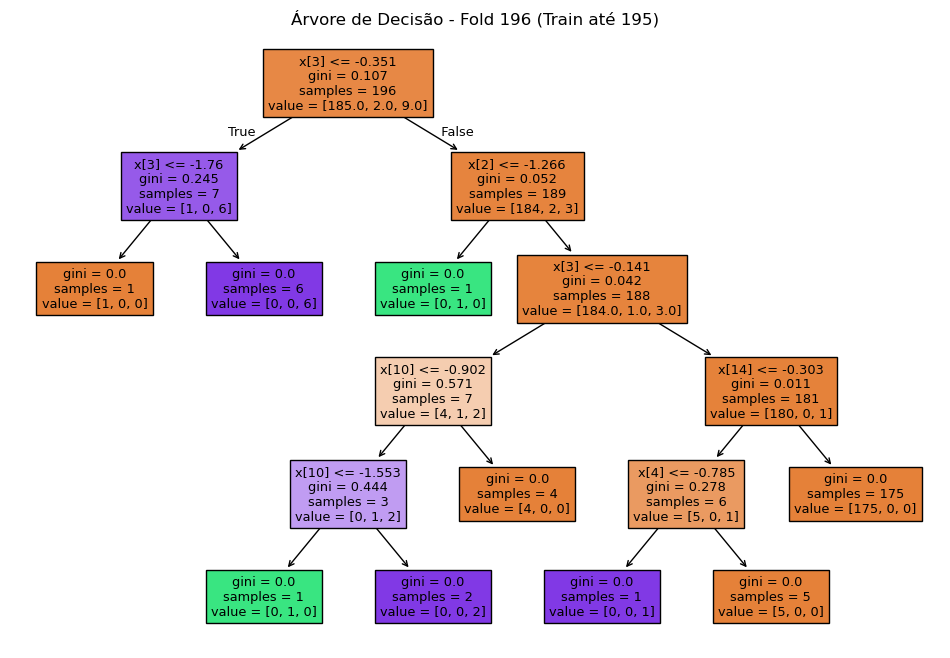

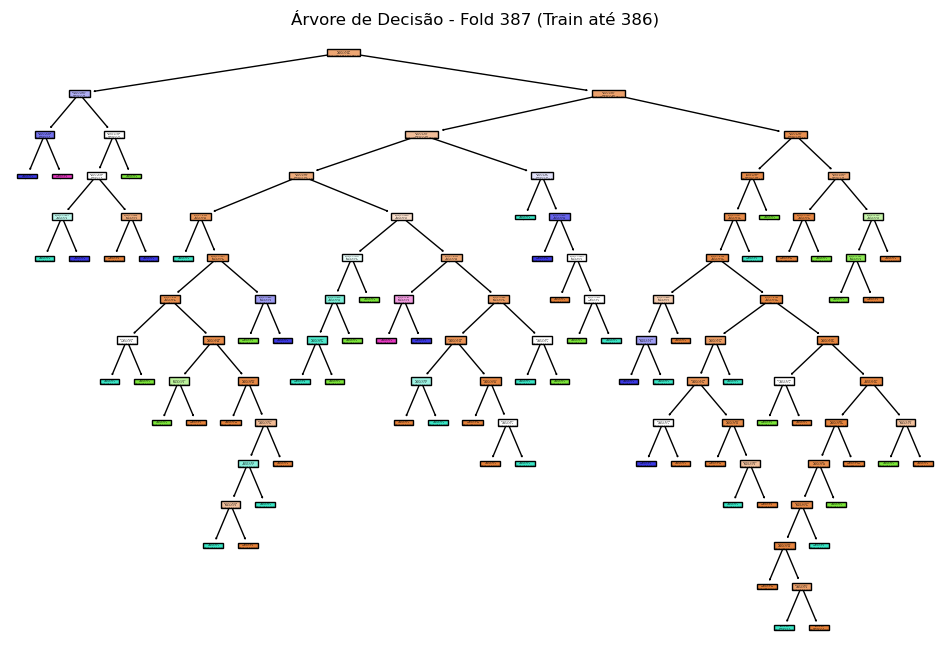

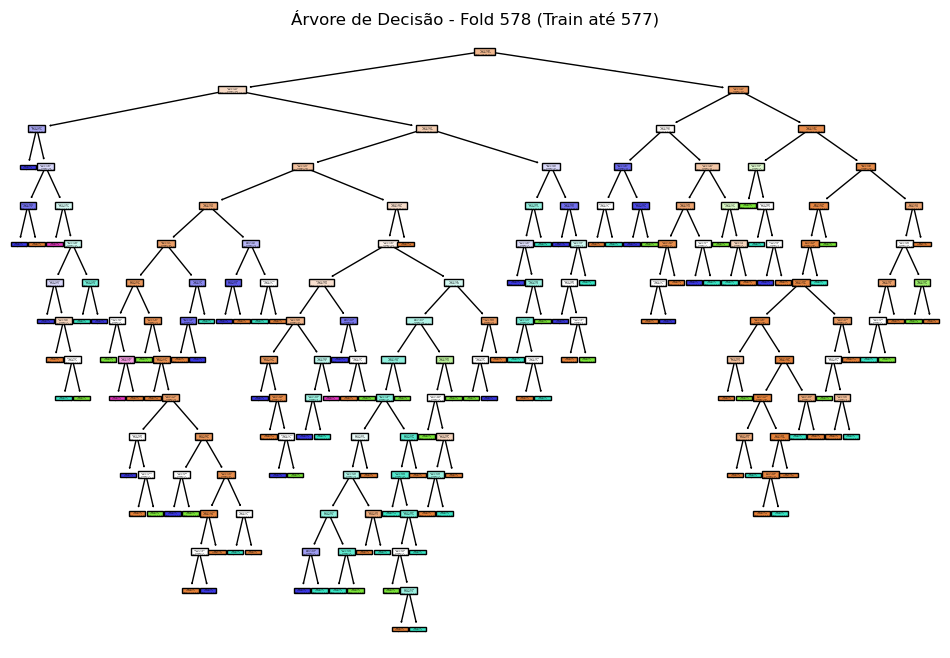

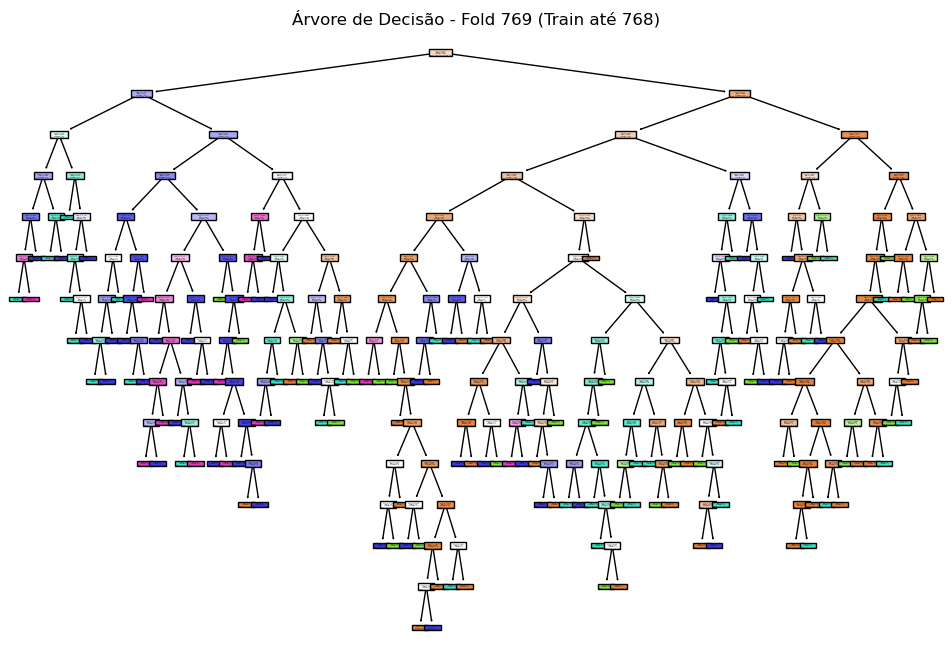

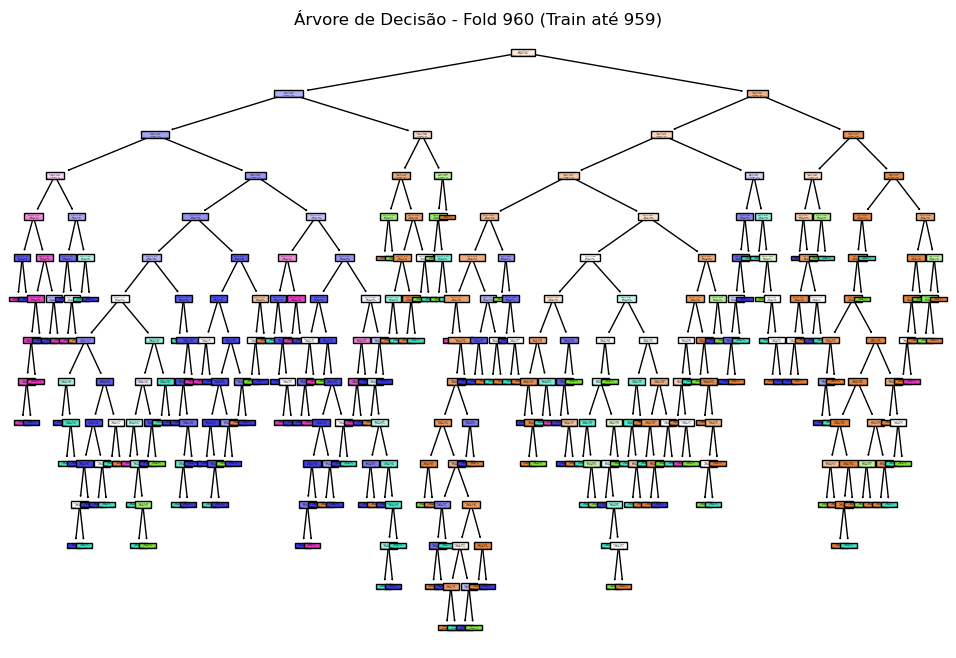

In [84]:
# Definindo o modelo da árvore de decisão
clf = DecisionTreeClassifier()

# Configurando o TimeSeriesSplit (5 divisões neste exemplo)
tscv = TimeSeriesSplit(n_splits=5)

# Usando a primeira divisão para treinar e testar o modelo
for train_index, test_index in tscv.split(X_norm):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]
    
    # Treinando a árvore de decisão com o conjunto de treino
    clf.fit(X_train, y_train)
    
    # Plotando a árvore de decisão após o treino
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True)
    plt.title(f"Árvore de Decisão - Fold {len(train_index)} (Train até {train_index[-1]})")
    plt.show()